In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import spacy
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# biz = dd.read_json('E:/_Large_datasets/Yelp/business.json', lines=True)#, blocksize=2**28)
rev = dd.read_json('/media/seapea/Blade HDD/_Storage/Data/yelp_dataset/review.json', lines=True, blocksize=2**22)
# usr = dd.read_json('G:/SharedSpace/_Large_datasets/Yelp/user.json', lines=True, blocksize=2**28)

In [3]:
rev = rev.drop('review_id', axis=1)

In [4]:
# Lower blocksize (i.e. 2*22) made this work in Ubuntu
rev.useful.mean().compute()

1.3541339236303265

In [5]:
rev.head()

,business_id,cool,date,funny,stars,text,useful,user_id
0,ujmEBvifdJM6h6RLv4wQIg,0,2013-05-07 04:34:36,1,1,Total bill for this horrible service? Over $8G...,6,hG7b0MtEbXx5QzbzE6C_VA
1,NZnhc2sEQy3RmzKTZnqtwQ,0,2017-01-14 21:30:33,0,5,I *adore* Travis at the Hard Rock's new Kelly ...,0,yXQM5uF2jS6es16SJzNHfg
2,WTqjgwHlXbSFevF32_DJVw,0,2016-11-09 20:09:03,0,5,I have to say that this office really has it t...,3,n6-Gk65cPZL6Uz8qRm3NYw
3,ikCg8xy5JIg_NGPx-MSIDA,0,2018-01-09 20:56:38,0,5,Went in for a lunch. Steak sandwich was delici...,0,dacAIZ6fTM6mqwW5uxkskg
4,b1b1eb3uo-w561D0ZfCEiQ,0,2018-01-30 23:07:38,0,1,Today was my second out of three sessions I ha...,7,ssoyf2_x0EQMed6fgHeMyQ


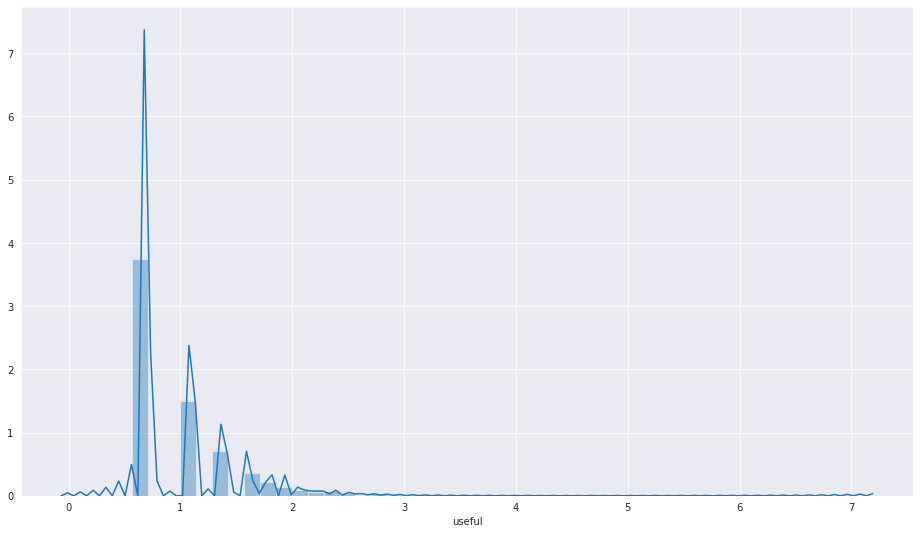

In [8]:
fig, ax = plt.subplots(figsize=(16,9))
sns.distplot(np.log((rev.useful + 2).compute()))

In [51]:
rev[rev.useful == rev.useful.max().compute()].text.compute()

203142    Dinner for 1.\n\n- Preface\nI went to Amy's Ba...
Name: text, dtype: object

In [11]:
nlp = spacy.load('en_core_web_lg')

In [9]:
tt = rev.text.loc[0].compute()

In [10]:
tt

0    Total bill for this horrible service? Over $8G...
0    I went to Chirofit after a car accident, and i...
0    The food tasted the same as Chipotle back in m...
0    Absolutely phenomenal food ! Excellent service...
0    This company replaced the opener motor last ye...
0    Nicolette is amazing! I was a first time custo...
0    Great place to come relax or party to good mus...
0    Maybe the big name in Vegas' Strip negates con...
0    Always packed on the weekend, but usually wort...
0    TMI has been one of my favorite places to sit ...
0    The food and staff are beyond AMAZING! \nPorti...
0    there should be space for 4.5 stars because th...
0    The group I was with had a great time at this ...
0    We thought we would give it one more chance, b...
0    One of the nicest shopping areas around. And w...
0    In general, I'd say this location, in comparis...
0    I've gone here for Happy Hour twice with my co...
0    Recommend all Veterans to not go to this Neuro...
0    This 

In [12]:
nlp(tt)

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [16]:
nlp(tt.iloc[1])

I went to Chirofit after a car accident, and it was the best thing that I could have done. Dr. Stamp was awesome and really got my body back into shape... please forgive the pun. The office staff is very nice and is really on top of things. I'd definitely recommend the Peoria, AZ location!

The ONLY thing I was a little worried about (and not enough to take a star away) was that they are attached to a Gold's Gym. Never ONCE was I approached or pressured to join the gym.